# Testing Silhouette method for different image sizes

### Calculating the Silhouette method for different sizes and plotting run times

[0.8142919371506836, 0.8143097838565612, 0.8143142449933478]
[3.110452175140381, 49.41935992240906, 793.3339998722076]


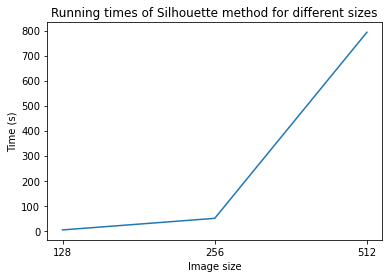

In [1]:
from matplotlib import pyplot as plt
import commonmethods.image_modification as im
import commonmethods.optimal_cluster_number as ocn

size_values = [128, 256, 512]
image = im.load_image_grayscale("5")
s_times = []
s_scores = []

for size in size_values:    
    image = im.resize_image(image, size)
    
    pixel_values = image.reshape((-1, 1))
    
    _,labels,_= im.kmeans_segmentation(pixel_values, 2)
    
    s_time, s_score = ocn.silhouette_method(pixel_values, labels)
    
    s_times.append(s_time)
    s_scores.append(s_score)
    
print(s_scores)
print(s_times)

default_x_ticks = range(len(size_values))

plt.title('Running times of Silhouette method for different sizes')

plt.plot(s_times)

plt.xticks(default_x_ticks, size_values)

plt.xlabel("Image size")
plt.ylabel("Time (s)")

plt.show()

## Silhouette method with different sizes and cluster numbers

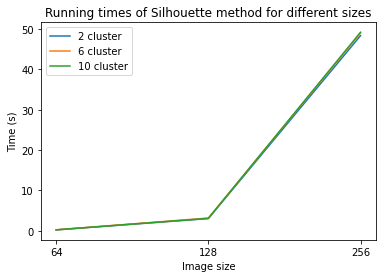

[[0.807986861942772, 2], [0.8142919371506836, 2], [0.8173462111946849, 2]]


In [2]:
from matplotlib import pyplot as plt
import commonmethods.image_modification as im
import commonmethods.optimal_cluster_number as ocn

size_values = [64, 128, 256]
image = im.load_image_grayscale("5")
s_closest = [[0, 2], [0, 2], [0, 2]]
all_times = []

for i in range(2, 11):
    s_times = []
    s_scores = []

    for j, size in enumerate(size_values):    
        resized_image = im.resize_image(image, size)
        
        pixel_values = resized_image.reshape((-1, 1))

        _,labels,_ = im.kmeans_segmentation(pixel_values, 2)

        s_time, s_score = ocn.silhouette_method(pixel_values, labels)

        s_times.append(s_time)
        s_scores.append(s_score)
        
        #get the best cluster number
        if((1-s_score) < (1-s_closest[j][0])):
            s_closest[j] = [s_score, i]

    all_times.append(s_times)
            
default_x_ticks = range(len(size_values))

plt.title('Running times of Silhouette method for different sizes')

plt.plot(all_times[0], label='2 cluster')
plt.plot(all_times[4], label='6 cluster')
plt.plot(all_times[8], label='10 cluster')

plt.xticks(default_x_ticks, size_values)

plt.xlabel("Image size")
plt.ylabel("Time (s)")

plt.legend()
plt.show()
    
print(s_closest)